# Analisis temporal de los datos de Trocafone

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
#Traemos el csv y convertimos su columna de tiempo en un datetime
df = pd.read_csv('events.csv', low_memory=False)
df['timestamp']=pd.to_datetime(df['timestamp'])

In [3]:
#Demostracion: No hay eventos nulos asociados a fechas
events = df['event']
dates = df['timestamp']

print((events.count()) == (events.size))
print((dates.count()) == (dates.size))

# Si ambos son True los eventos se corresponden 1 a 1 con las fechas

True
True


## Que dia de la semana tiene mas trafico de eventos

In [4]:
df['diasemana'] = df['timestamp'].dt.weekday

In [5]:
#Cuenta las ocurrencias de cada dia de la semana, de Lunes a Domingo sin ordenar
dfDiasYEventos= (df['diasemana'].value_counts(normalize=True, sort=False)*100).to_frame()
dfDiasYEventos['dia'] = dfDiasYEventos.index
dfDiasYEventos = dfDiasYEventos.replace(0,'Lunes').replace(1,'Martes').replace(2,'Miercoles').replace(3,'Jueves').replace(4,'Viernes').replace(5,'Sabado').replace(6,'Domingo')

#Cambiamos el indice a lo reemplazado
dfDiasYEventos= dfDiasYEventos.set_index(['dia'])
dfDiasYEventos.columns= ['PorcentajeEventos']
dfDiasYEventos

,PorcentajeEventos
dia,
Lunes,14.771756
Martes,16.812224
Miercoles,16.248883
Jueves,16.006123
Viernes,14.770372
Sabado,11.333270
Domingo,10.057372


Text(0,0.5,'Cantidad de eventos (%)')

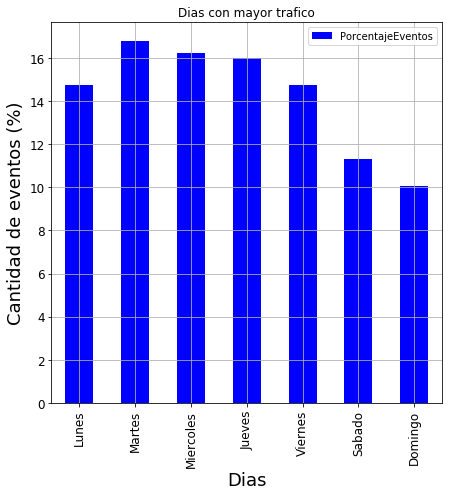

In [6]:
plt1 = dfDiasYEventos.plot(kind = 'bar',color='blue', grid=True, title = "Dias con mayor trafico",figsize =(7,7),legend = True, fontsize = 12)
plt1.set_xlabel("Dias",fontsize = 18)
plt1.set_ylabel("Cantidad de eventos (%)",fontsize = 18)

# Horario de mayor trafico de usuarios en Trocafone

In [7]:
df['horaDelDia'] = df['timestamp'].dt.hour
a = df.loc[df['event']=='viewed product']
a = df['horaDelDia'].value_counts()


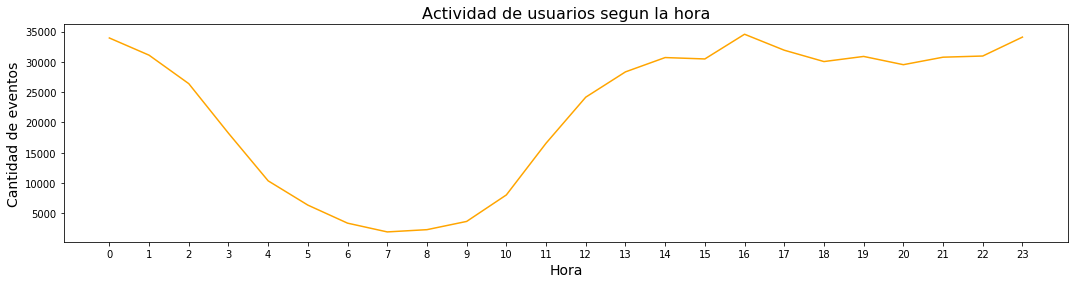

In [8]:
productosVistos = df.loc[df['event']=='viewed product']
horarios = productosVistos['timestamp'].dt.hour.value_counts().sort_index()
plt.figure(figsize = (18,4))
g = horarios.plot(xticks= range(0,24), color = 'orange')
g.set_title('Actividad de usuarios segun la hora', fontsize=16)
g.set_xlabel('Hora', fontsize=14)
g.set_ylabel('Cantidad de eventos', fontsize=14);


#### Teniendo en cuenta que el evento predominante dentro de nuestro set de datos est Viewed Product. La gente suele mirar mas celulares en el horario de las 16 hs


# Mes de mayor cantidad de ventas

In [9]:
import calendar
df['meses'] = df['timestamp'].dt.month
b = df.loc[df['event']=='conversion']
df['meses'] = df['meses'].map(lambda x: calendar.month_abbr[x])
b = df['meses'].value_counts(sort = False)

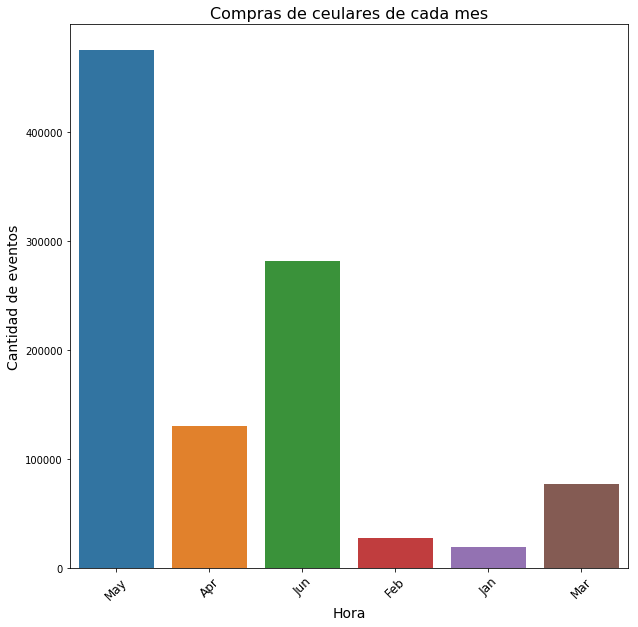

In [10]:
plt.figure(figsize = (10,10))
g = sns.barplot(x= b.index, y=b.values, orient= 'v')
g.set_title('Compras de ceulares de cada mes', fontsize=16)
g.set_xlabel('Hora', fontsize=14)
g.set_ylabel('Cantidad de eventos', fontsize=14);
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize=12);

# Cantidad de eventos por horario segun el dia de la semana